In [1]:
import umap
import umap.plot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pdf = pd.read_parquet("../data/tmp/pca.parquet")
pdf.head()

f:\kaggle\amex\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,feature,label
0,"[4.871973087193099, -2.3501027650410067, -2.47...",1.0
1,"[-5.650198929154265, 2.7206217582803407, 1.111...",0.0
2,"[4.919143472062509, -1.7061652732205215, 1.212...",1.0
3,"[-3.1647523843546317, -0.383737156876233, 0.20...",0.0
4,"[-4.876814855544456, 0.6441262914406339, 0.898...",0.0


TNSE results in the following error:

```
OpenBLAS warning: precompiled NUM_THREADS exceeded, adding auxiliary array for thread metadata.
OpenBLAS : Program is Terminated. Because you tried to allocate too many memory regions.
This library was built to support a maximum of 5OpenBLAS : Program is Terminated. Because you tried to allocate too many memory regions.
This library was built to support a maximum of 50 threads - either rebuild OpenBLAS
with a larger NUM_THREADS value or set the environment variable OPENBLAS_NUM_THREADS to
a sufficiently small number. This error typically occurs when the software that relies on
OpenBLAS calls BLAS functions from many threads in parallel, or w0 threads - either rebuild OpenBLAS
with a larger NUM_THREADS value or set the environment variable OPENBLAS_NUM_THREADS to
a suffhen your computer has more
cpu cores than what OpenBLAS was configured to handle.
```

In [6]:
X = np.stack(pdf.feature.values)
G = umap.UMAP(n_components=2, n_neighbors=20).fit_transform(X[:50_000, :])

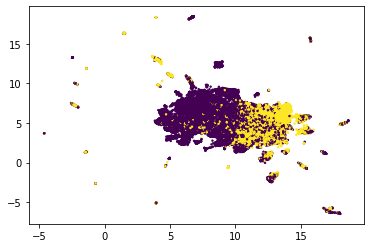

In [7]:
plt.scatter(G[:, 0], G[:, 1], c=pdf.label.values[:50_000], s=2)

f:\kaggle\amex\venv\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
f:\kaggle\amex\venv\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
f:\kaggle\amex\venv\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


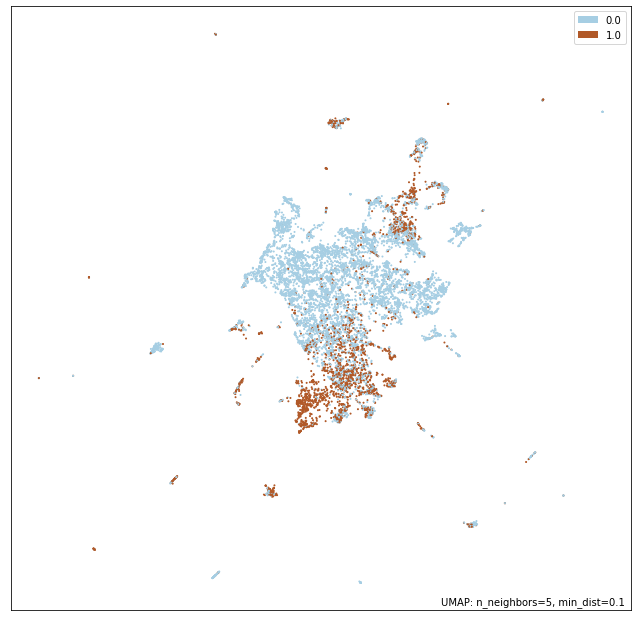

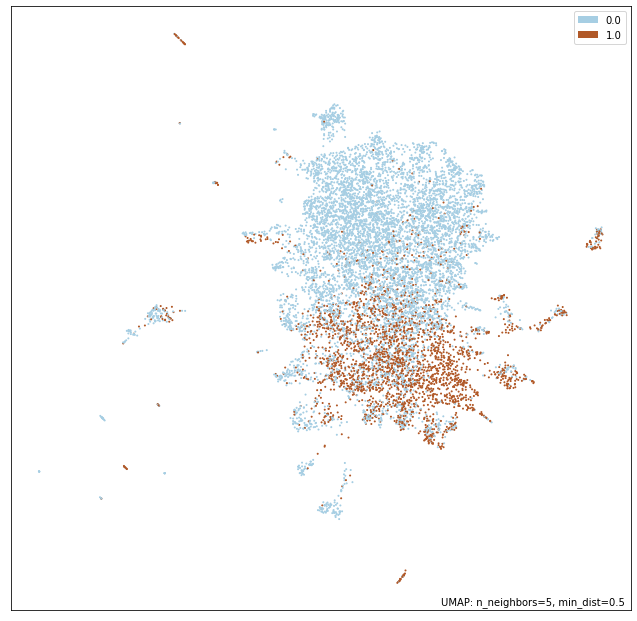

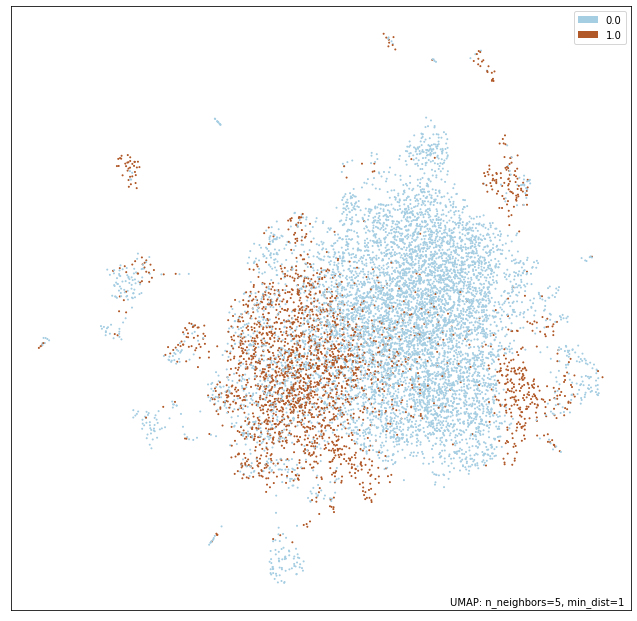

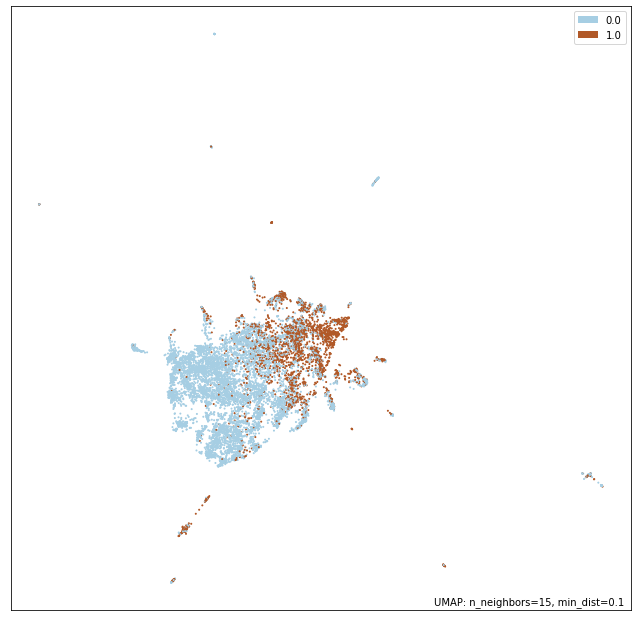

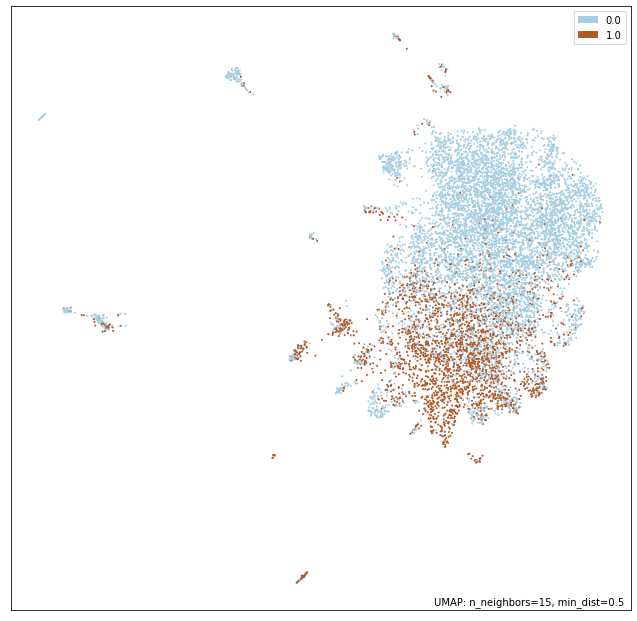

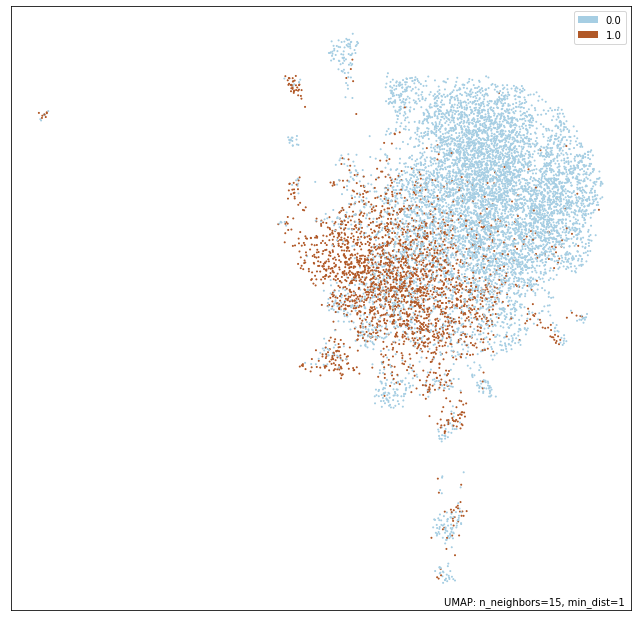

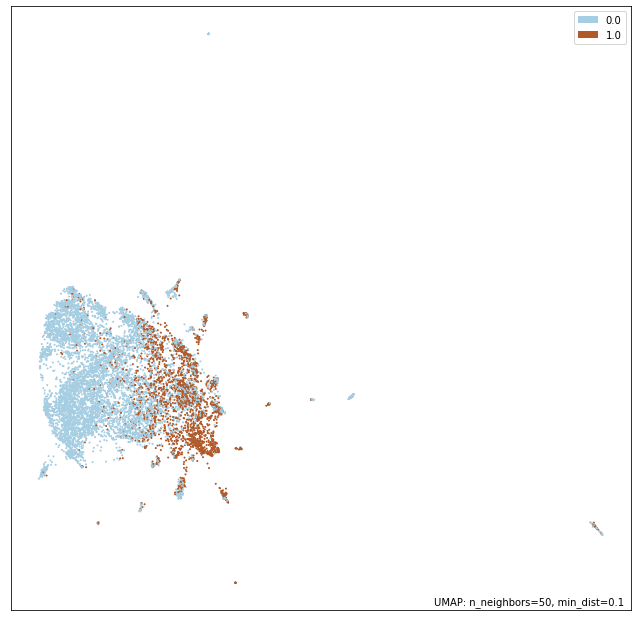

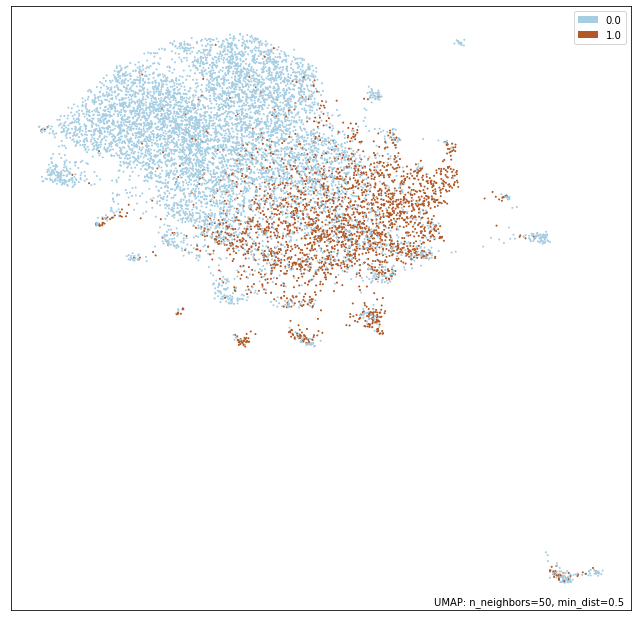

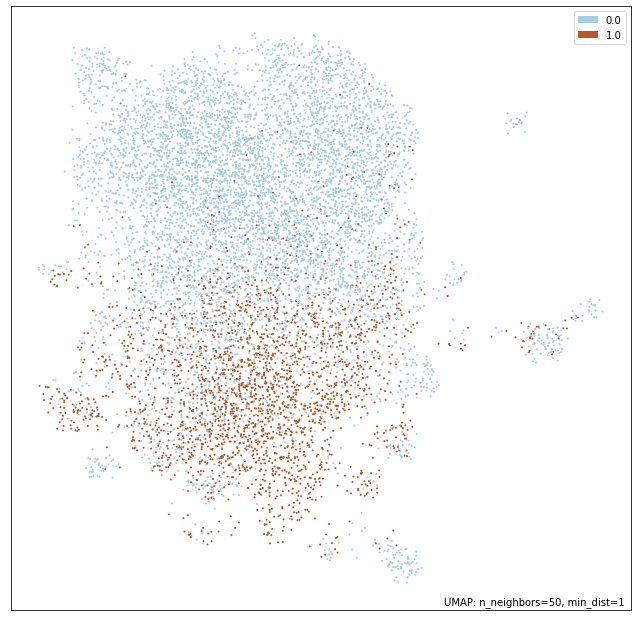

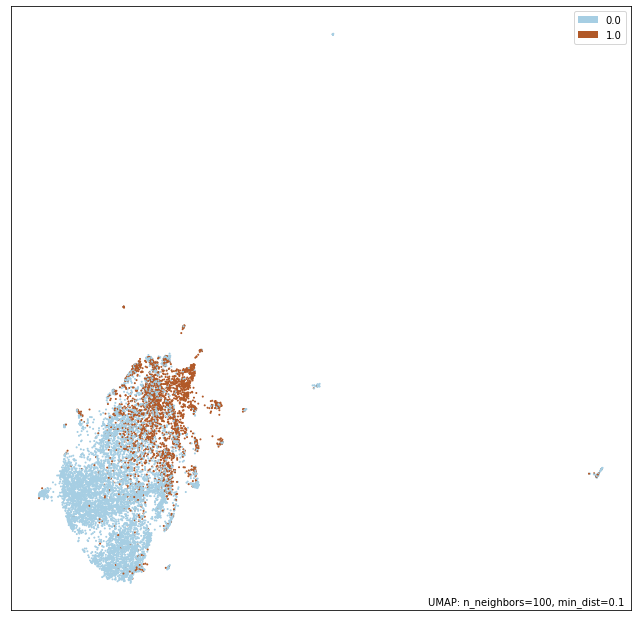

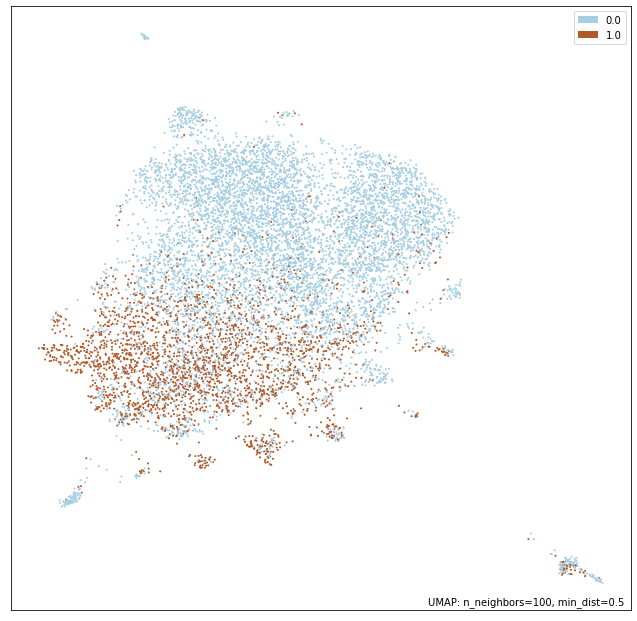

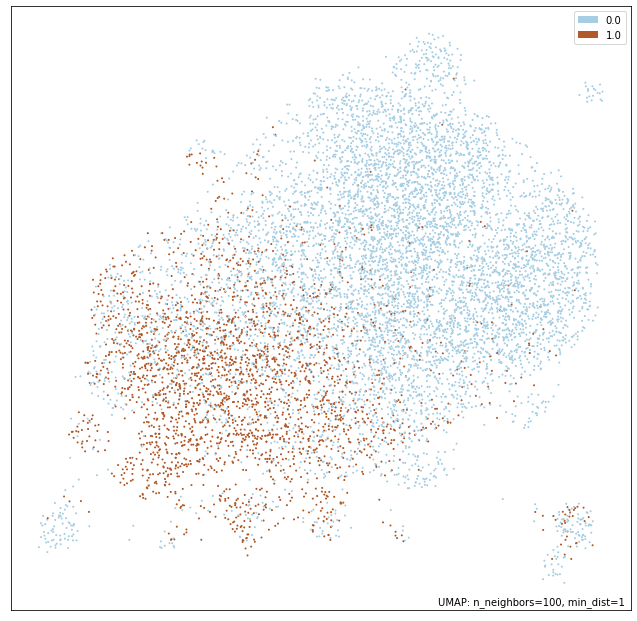

In [23]:
n = 10_000
for neighbors in [5, 15, 50, 100]:
    for dist in [0.1, 0.5, 1]:
        mapper = umap.UMAP(n_components=2, n_neighbors=neighbors, min_dist=dist).fit(
            X[:n, :]
        )
        umap.plot.points(mapper, color_key_cmap="Paired", labels=pdf.label.values[:n])

f:\kaggle\amex\venv\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


<AxesSubplot:>

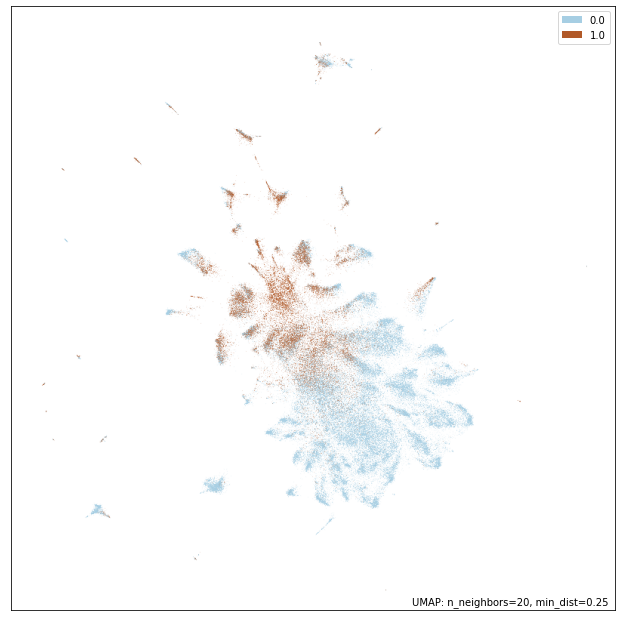

In [24]:
n = 100_000
mapper = umap.UMAP(n_components=2, n_neighbors=20, min_dist=0.25).fit(X[:n, :])
umap.plot.points(mapper, color_key_cmap="Paired", labels=pdf.label.values[:n])